# Building a Handwritten Digits Classifier with Deep Feedforward Neural Networks

###### In this project we will be looking at images and classifying them into numbers. 

###### This will be done through deep neural networks using a variety of neuron sizes and levels. We will compare this to K-Nearest Neigbours.

###### The data is found [here](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) from the UCI dataset

### Why Is This Difficult?

###### Each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.

###### Images are often down sampled to low resolutions and often grayscale, vast information is lost. (an 8megapixel is 3264 x 2448 pixes or 8million features, the processing on each image at this size would be extensive)

###### There is no obvious mathematical description between images so models like linear and logistic regression would not work.

### So Why Use Neural Networks?

###### A Neural Network can learn intermediate representations at each layer. In this heirarchical representations are formed in multiple layers to fit the data.

### Import & Preview The Data

In [1]:
import random as random
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
column_names = load_digits()['feature_names']
data, target = load_digits(return_X_y = True)

In [3]:
features = pd.DataFrame(data, columns = column_names)
target = pd.Series(target)

In [4]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [5]:
np.random.seed(1)
features.sample(5)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1227,0.0,0.0,6.0,16.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,15.0,16.0,3.0,0.0,0.0
1576,0.0,8.0,13.0,15.0,16.0,16.0,8.0,0.0,0.0,9.0,...,0.0,0.0,0.0,9.0,16.0,6.0,0.0,0.0,0.0,0.0
202,0.0,0.0,4.0,15.0,11.0,1.0,0.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,4.0,13.0,14.0,6.0,0.0,0.0
1184,0.0,0.0,2.0,9.0,14.0,16.0,15.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,14.0,5.0,0.0,0.0,0.0
428,0.0,0.0,0.0,1.0,12.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,15.0,13.0,0.0,0.0


In [6]:
features.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


###### Each column depicts one of 64 pixels, (pixel 1_2 is row 1, third pixel) in these 8x8 pixel images. 

###### Lets preview some of these images.

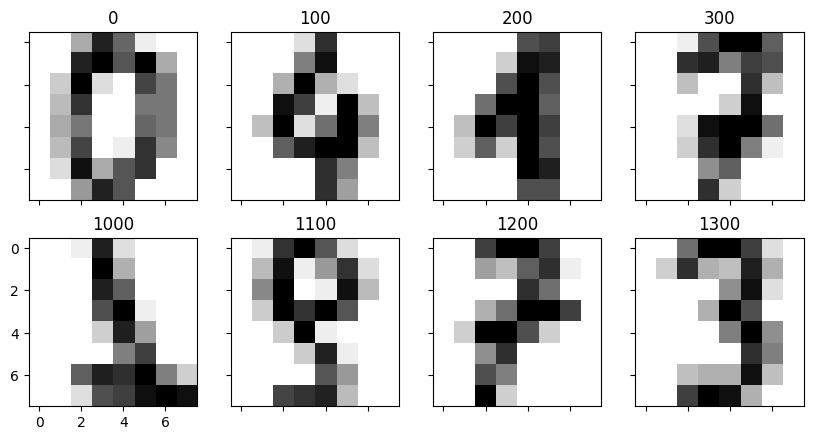

In [7]:
image_rows= [0,100,200,300,1000,1100,1200,1300]
fig = plt.figure(figsize = (10,5))
for sequence, row in enumerate(image_rows):
    image = features.iloc[row].values.reshape(8,8)
    ax = fig.add_subplot(2,4,(sequence+1))
    ax.set_title(row)
    ax.tick_params(labelright=False)
    ax.tick_params(labeltop=False)
    if sequence != 4:
        ax.tick_params(labelleft=False)
        ax.tick_params(labelbottom = False)
    ax.imshow(image, cmap='gray_r')

###### Now lets see what the target values for these actually are:

In [8]:
target.iloc[image_rows]

0       0
100     4
200     1
300     7
1000    1
1100    9
1200    7
1300    3
dtype: int64

###### Row 1000 is supposed to be a 1, even a human would struggle to decipher this image.

In [9]:
all_data = features.copy()
all_data['target'] = target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(all_data.drop(columns = ['target']), all_data['target'], train_size = 0.8, random_state = 1)

### K-Nearest Neigbours (KNN)

###### One approach to solving the problem is KNN. 

###### In this model predictions are made by how close the features are to other features.

###### The higher the number of neigbours the more local training datapoints that are considered in the prediction.

In [11]:
def k_train(k_folds, X_train, y_train):
    #Create, fit and return a model with k_value nearest neigbors#
    knn_model = KNeighborsClassifier(n_neighbors= k_value)
    knn_model.fit(X_train, y_train)
    return knn_model

def k_test(knn_model, X_test, y_test):
    #Create predictions from the test set using the model#
    # Return accuracy #
    predictions = knn_model.predict(X_test)
    train_test_dataframe = pd.DataFrame(y_test, columns = ['label'])
    train_test_dataframe['predicted'] = predictions
    #Calculate the rate of correct answers as a decimal#
    accuracy = (sum(train_test_dataframe['label'] == train_test_dataframe['predicted'])) / len(train_test_dataframe)
    return accuracy

def k_cross_validate(k_nearest_neigbours):
    # Create 4 folds and iterate through the folds#
    # For each fold use K_train and K_test to determine accuracies for each K_fold#
    fold_accuracies = []
    kf_model = KFold(n_splits = 4, random_state =2, shuffle = True)
    for train_index, test_index in kf_model.split(data):
        X_train, X_test, = features.loc[train_index], features.loc[test_index]
        y_train, y_test  = target.loc[train_index], target.loc[test_index]
        knn_model = k_train(k_nearest_neigbours, X_train, y_train)
        accuracy = k_test(knn_model, X_test, y_test)
        fold_accuracies.append(accuracy)
    return fold_accuracies

###### Testing the model above for 1 to 19 K nearest neigbours

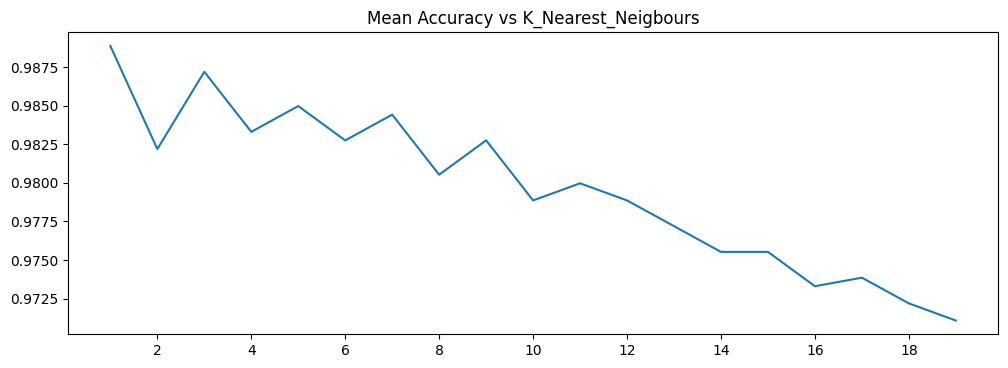

In [12]:
k_values = list(range(1,20)) 
k_overall_accuracies = []
for k_value in k_values:
    k_accuracies = k_cross_validate(k_value)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)

plt.figure(figsize=(12,4))
plt.title('Mean Accuracy vs K_Nearest_Neigbours')
plt.plot(k_values, k_overall_accuracies)
plt.xticks(list(range(2,19,2)))
plt.show()

In [13]:
k_overall_accuracies[0]

0.9888728037614452

###### K-Nearest Neighbours of 1 has shown very high accuracy.

###### There are however disadvantages for using this approach, there is high memory usage and no model representation to debug and explore.

### Neural Network Pipeline

###### Next lets develop the pipeline for our neural networks:

In [14]:
def NN_train(hidden_layer_size, X_train, y_train):
    #Create, fit and return a model with k_value nearest neigbors#
    NN_model = MLPClassifier(hidden_layer_sizes = hidden_layer_size, shuffle= True, solver='lbfgs', activation='logistic', max_iter=2000)
    NN_model.fit(X_train, y_train)
    return NN_model

def NN_test(NN_model, X_test, y_test, X_train, y_train):
    #Create predictions from the test set using the model#
    # Return accuracy #
    test_dataframe = pd.DataFrame(y_test, columns= ['label'])
    test_dataframe['predicted'] = NN_model.predict(X_test)
    test_accuracy = (sum(test_dataframe['label'] == test_dataframe['predicted'])) / len(test_dataframe)
    #Repeat for train accuracy to see where overfitting is occuring#
    train_dataframe = pd.DataFrame(y_train, columns= ['train_label'])
    train_dataframe['train_predicted'] = NN_model.predict(X_train)
    train_accuracy = (sum(train_dataframe['train_predicted'] == train_dataframe['train_label'])) / len(train_dataframe)
    return (test_accuracy, train_accuracy)

def NN_cross_validate(hidden_layer_size):
    #Create 4 folds and iterate through the folds#
    #For each fold use NN_train and NN_test to determine accuracies for each fold#
    fold_accuracies = []
    train_fold_accuracies = []
    kf_model = KFold(n_splits = 4, random_state =2, shuffle = True)
    for train_index, test_index in kf_model.split(data):
        X_train, X_test, = features.loc[train_index], features.loc[test_index]
        y_train, y_test  = target.loc[train_index], target.loc[test_index]
        NN_model = NN_train(hidden_layer_size, X_train, y_train)
        test_accuracy, train_accuracy = NN_test(NN_model, X_test, y_test, X_train, y_train)
        fold_accuracies.append(test_accuracy)
        train_fold_accuracies.append(train_accuracy)
    return (fold_accuracies, train_fold_accuracies)

### One Layer Neural Network

###### Next step is to test the accuracy using one layer and a variety of neurons numbering 8 to 256.

In [15]:
NN_overall_accuracy = []
NN_train_overall_accuracy = []
hidden_layer_sizes = [8,16,32,64,128,256]
for hidden_layer_size in hidden_layer_sizes:
    NN_fold_accuracies, NN_train_accuracies = NN_cross_validate(hidden_layer_size)
    average_NN_accuracy = np.mean(NN_fold_accuracies)
    average_train_accuracy = np.mean(NN_train_accuracies)
    NN_overall_accuracy.append(average_NN_accuracy)
    NN_train_overall_accuracy.append(average_train_accuracy)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown 

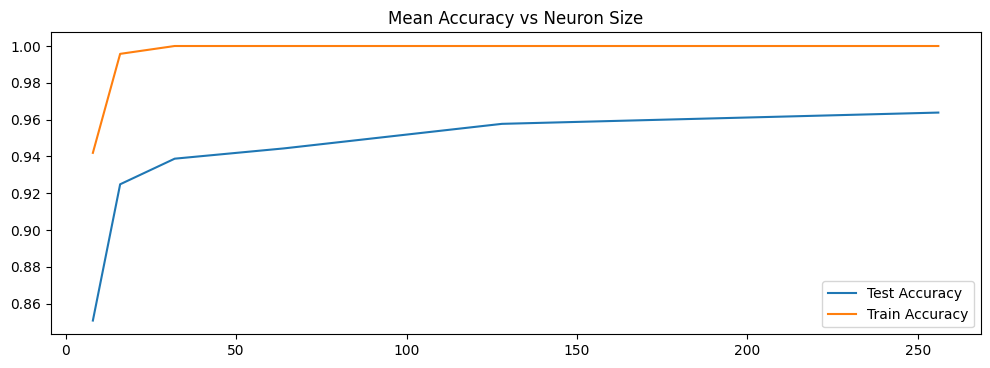

In [16]:
plt.figure(figsize=(12,4))
plt.title('Mean Accuracy vs Neuron Size')
plt.plot(hidden_layer_sizes, NN_overall_accuracy, label= 'Test Accuracy')
plt.plot(hidden_layer_sizes, NN_train_overall_accuracy, label= 'Train Accuracy')
plt.legend()
plt.show()

###### Adding more neurons is giving increased accuracy but at diminishing rate of returns considering the large processing power required.

###### How does this compare against multiple layers?

###### Overfitting is not a significant issue at 32 neurons and above, as both accuracies are very high.

### Dual Layer Neural Network

###### Next up is testing a 'deeper' network that has two hidden layers. Here we will test dual layers of sizes 64, 128 and 256.

In [17]:
dual_NN_test_accuracies = []
dual_NN_train_accuracies = []
dual_hidden_layer_sizes = [(64,64), (128,128),(256,256)]
for dual_hidden_layer in dual_hidden_layer_sizes:
    dual_NN_test_accuracy, dual_NN_train_accuracy = NN_cross_validate(dual_hidden_layer)
    dual_NN_test_accuracies.append(np.mean(dual_NN_test_accuracy))
    dual_NN_train_accuracies.append(np.mean(dual_NN_train_accuracy))

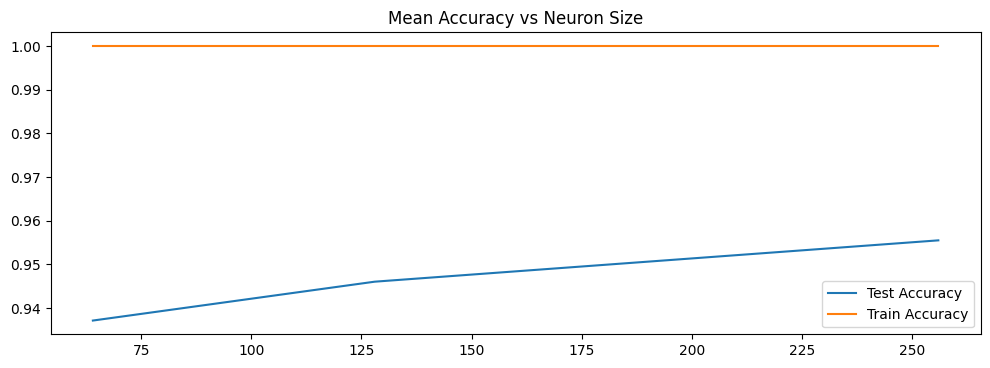

In [18]:
dual_hidden_layer_sizes_list = [64,128,256]
plt.figure(figsize=(12,4))
plt.title('Mean Accuracy vs Neuron Size')
plt.plot(dual_hidden_layer_sizes_list, dual_NN_test_accuracies, label= 'Test Accuracy')
plt.plot(dual_hidden_layer_sizes_list, dual_NN_train_accuracies, label= 'Train Accuracy')
plt.legend()
plt.show()

In [19]:
print(np.max(dual_NN_test_accuracies))

0.9554887404107892


###### A train accuracy of 100% throughout, amazingly this hasnt comprimised the accuracy of the test set with highest accuracy of 96% at 126 neurons 

###### Could we increase this further?

### Tri Layer Neural Network

###### One solution to overfitting is to increase the K-Fold value

###### Lets use 6 fold cross validation and train a model using 3 hidden layers

In [20]:
def NN_cross_validate_six(hidden_layer_size):
    #Create 4 folds and iterate through the folds#
    #For each fold use NN_train and NN_test to determine accuracies for each fold#
    fold_accuracies = []
    train_fold_accuracies = []
    #Updated function for n_splits = 6#
    kf_model = KFold(n_splits = 6, random_state =2, shuffle = True)
    for train_index, test_index in kf_model.split(data):
        X_train, X_test, = features.loc[train_index], features.loc[test_index]
        y_train, y_test  = target.loc[train_index], target.loc[test_index]
        NN_model = NN_train(hidden_layer_size, X_train, y_train)
        test_accuracy, train_accuracy = NN_test(NN_model, X_test, y_test, X_train, y_train)
        fold_accuracies.append(test_accuracy)
        train_fold_accuracies.append(train_accuracy)
    return (fold_accuracies, train_fold_accuracies)

In [21]:
tri_NN_test_accuracies = []
tri_NN_train_accuracies = []
tri_hidden_layer_sizes = [(10,10,10), (64,64,64),(128,128,128)]
for tri_hidden_layer in tri_hidden_layer_sizes:
    tri_NN_test_accuracy, tri_NN_train_accuracy = NN_cross_validate(tri_hidden_layer)
    tri_NN_test_accuracies.append(np.mean(tri_NN_test_accuracy))
    tri_NN_train_accuracies.append(np.mean(tri_NN_train_accuracy))

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown 

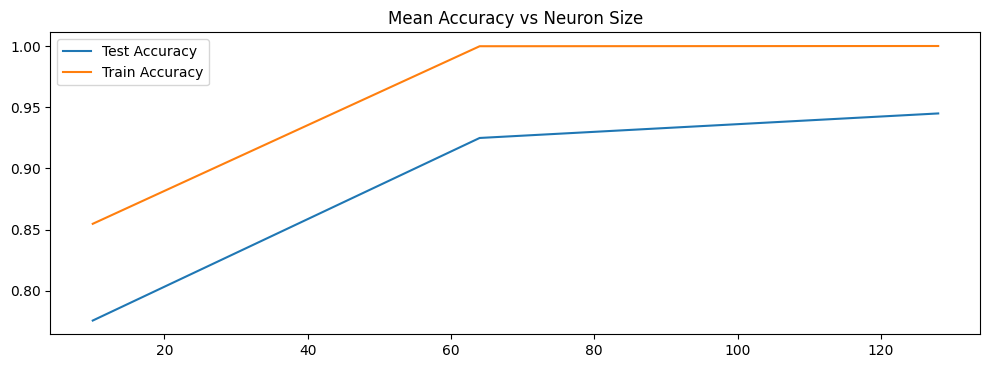

In [22]:
tri_hidden_layer_sizes_list = [10,64,128]
plt.figure(figsize=(12,4))
plt.title('Mean Accuracy vs Neuron Size')
plt.plot(tri_hidden_layer_sizes_list, tri_NN_test_accuracies, label= 'Test Accuracy')
plt.plot(tri_hidden_layer_sizes_list, tri_NN_train_accuracies, label= 'Train Accuracy')
plt.legend()
plt.show()

###### Train accuracy is still 100% but test accuracy is now lower and processing power is large.

###### Overfitting is worse with three layers.

###### Best accuracy seen is with two layers of 128 neurons.

### Seeing Where The Model Fails

###### Lets now look at where our best model did not predict well.

In [23]:
NN_models = []
kf_model = KFold(n_splits = 4, random_state =2, shuffle = True)
for train_index, test_index in kf_model.split(data):
    X_train, X_test, = features.loc[train_index], features.loc[test_index]
    y_train, y_test  = target.loc[train_index], target.loc[test_index]
    NN_model = MLPClassifier(hidden_layer_sizes = [128,128], shuffle= True, solver='lbfgs', activation='logistic', max_iter=2000)
    NN_model.fit(X_train, y_train)
    NN_models.append(NN_model)

###### Next create the predictions from each kfold model with the dual 128 neuron layers.

###### Average the predictions and assign this to a new dataframe making sure the predictions are integers (as our classifications are integers)

In [24]:
predictions = []
for model in NN_models:
    predictions.append(model.predict(features))
test_dataframe = pd.DataFrame(features)
test_dataframe['label'] = target
test_dataframe['predictions'] = np.mean(predictions, axis = 0)
test_dataframe['predictions'] = test_dataframe['predictions'].astype(int)
incorrect_results = test_dataframe[test_dataframe['label'] != test_dataframe['predictions']]
print(len(incorrect_results))

85


###### 89 incorrect results from nearly 1800 rows is very impressive.

###### Next lets view 10 random incorrectly labelled images

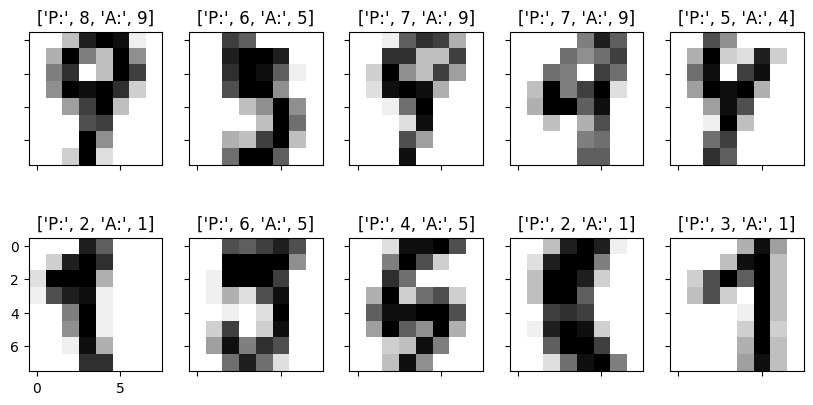

In [25]:
incorrect_image_rows= incorrect_results.sample(10, random_state =2).index
incorrect_fig = plt.figure(figsize = (10,5))
features = pd.DataFrame(data, columns = column_names)
for sequence, row in enumerate(incorrect_image_rows):
    incorrect_results_features = incorrect_results.drop(columns = ['predictions','label'])
    image = incorrect_results_features.loc[row].values.reshape(8,8)
    ax = incorrect_fig.add_subplot(2,5,(sequence+1))
    value = incorrect_results['predictions'].loc[row]
    actual = incorrect_results['label'].loc[row]
    ax.set_title(['P:',value, 'A:', actual])
    ax.tick_params(labelright=False)
    ax.tick_params(labeltop=False)
    if sequence != 5:
        ax.tick_params(labelleft=False)
        ax.tick_params(labelbottom = False)
    ax.imshow(image, cmap='gray_r')

###### Above we see the predicted (P:) and actual (A:) numbers

###### Some images here are frankly hard to believe they represent the numbers they suggest. It is no wonder that the neural network struggled. 

###### The 96% accuracy shows the power that neural networks have and they dont require pre-existing information about how a certain number should look like.